<a href="https://colab.research.google.com/github/fridriscvski/weeds-classification/blob/main/weed_species_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Dataset organizer

Don't run it if your dataset is structured

In [ ]:
# import shutil

# DATASET_PATH = "drive/My Drive/TCC/brazilian_weeds_2020"
# families = os.listdir(DATASET_PATH)

# def get_species():
#   species = []
#   for family in families:
#     if os.path.isdir(os.path.join(DATASET_PATH, family)):
#       species.extend(os.listdir(os.path.join(DATASET_PATH, family)))
#   return species

# classes = get_species()

In [ ]:
# def search_images(path, image_paths=[]):
#     image_extensions = ['jpg', 'jpeg']

#     if os.path.exists(path) and os.path.isdir(path):
#         for file in os.listdir(path):
#             file_extension = file.split(".")[-1].lower()
#             if file_extension in image_extensions:
#                   image_paths.append(os.path.join(path, file))
#             elif os.path.isdir(os.path.join(path, file)):
#                 search_images(os.path.join(path, file), image_paths)
#     return image_paths

# def get_class(image_path, classes):
#   for plant_class in classes:
#     if plant_class.lower() in image_path.lower():
#       return plant_class
#   return None

# def build_dataset(dataset_path, classes):
#   image_paths = search_images(dataset_path)

#   for image_path in image_paths:
#     label = get_class(image_path, classes)
#     destination_path = "drive/My Drive/TCC/brazil_weeds_2020_species_classification/" + label + "/"

#     if not os.path.exists(destination_path):
#       os.makedirs(destination_path)

#     shutil.copy(image_path, destination_path)

# build_dataset(DATASET_PATH, classes)

## Classifier

In [ ]:
DATASET_PATH = "drive/My Drive/TCC/brazil_weeds_2020_species_classification"
classes = os.listdir(DATASET_PATH)
classes

['Tridax procumbens',
 'Sonchus oleraceus',
 'Bidens-pilosa',
 'Leonurus sibiricus',
 'Digitaria insularis',
 'Rhynchelytrumrepens',
 'Cenchus echinatus',
 'Choris barbata',
 'Sorghum arundinaceum',
 'Physalis angulata',
 'Amaranthus hybridos',
 'Ipomoeae purpurea',
 'Cyclospermum leptophyllum',
 'Lelidium virginum']

In [ ]:
class_dict = {
  'Sorghum arundinaceum': [],
  'Cenchus echinatus': [],
  'Rhynchelytrumrepens': [],
  'Digitaria insularis': [],
  'Choris barbata': [],
  'Tridax procumbens': [],
  'Bidens-pilosa': [],
  'Sonchus oleraceus': [],
  'Leonurus sibiricus': [],
  'Physalis angulata': [],
  'Amaranthus hybridos': [],
  'Lelidium virginum': [],
  'Ipomoeae purpurea': [],
  'Cyclospermum leptophyllum': [],
}


for cls in classes:
    class_dict[cls] = len(os.listdir(os.path.join(DATASET_PATH, cls)))

class_dict

{'Sorghum arundinaceum': 63,
 'Cenchus echinatus': 60,
 'Rhynchelytrumrepens': 60,
 'Digitaria insularis': 55,
 'Choris barbata': 51,
 'Tridax procumbens': 63,
 'Bidens-pilosa': 57,
 'Sonchus oleraceus': 45,
 'Leonurus sibiricus': 68,
 'Physalis angulata': 64,
 'Amaranthus hybridos': 59,
 'Lelidium virginum': 52,
 'Ipomoeae purpurea': 45,
 'Cyclospermum leptophyllum': 45}

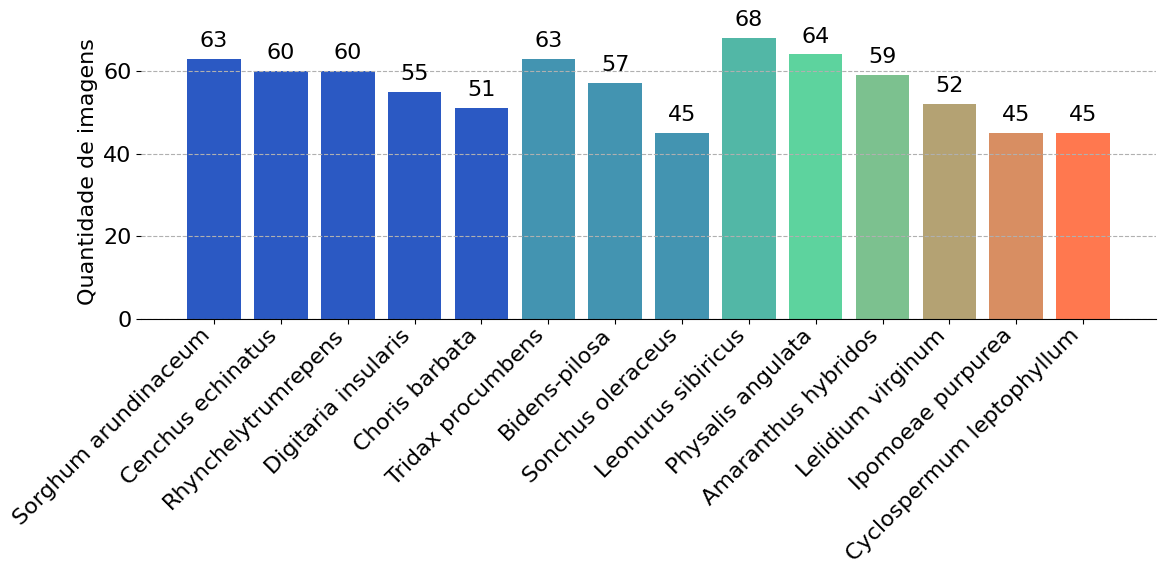

In [ ]:
gradient_colors = [
    '#2B59C3', '#2B59C3', '#2B59C3', '#2B59C3', '#2B59C3', '#4394B1', '#4394B1', '#4394B1', '#52B7A6', '#5DD39E',
    '#7CC18F', '#B4A273', '#D88E62', '#FF784F'
]

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(12, 6))
bars = plt.bar(class_dict.keys(), class_dict.values(), color=gradient_colors)
plt.ylabel('Quantidade de imagens')

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='x', which='major', pad=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y', linestyle='--')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [ ]:
img_height = 1024
img_width = 1024
batch_size = 32

full_ds = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  image_size=(img_width, img_height),
  batch_size=batch_size,
  shuffle=True,
  seed=123  # Set seed for reproducibility
)

total_samples = len(full_ds)
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

train_ds = full_ds.take(train_size)
remaining_ds = full_ds.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

Found 787 files belonging to 14 classes.


In [ ]:
class_names = full_ds.class_names
class_names

['Amaranthus hybridos',
 'Bidens-pilosa',
 'Cenchus echinatus',
 'Choris barbata',
 'Cyclospermum leptophyllum',
 'Digitaria insularis',
 'Ipomoeae purpurea',
 'Lelidium virginum',
 'Leonurus sibiricus',
 'Physalis angulata',
 'Rhynchelytrumrepens',
 'Sonchus oleraceus',
 'Sorghum arundinaceum',
 'Tridax procumbens']

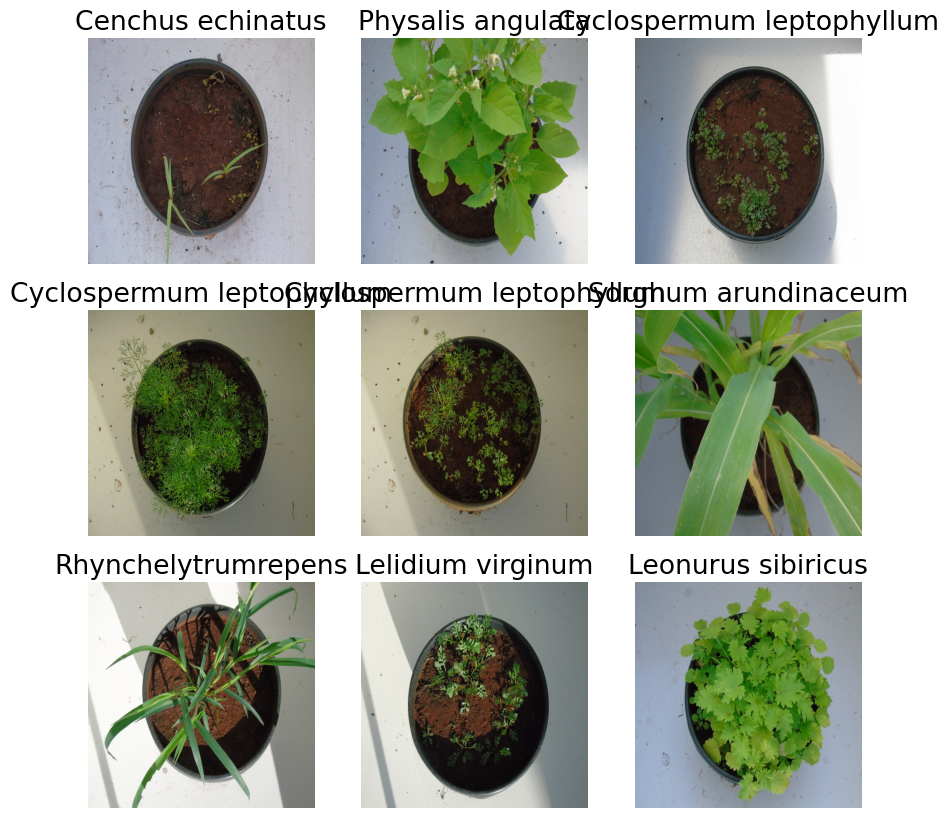

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_width,img_height,3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.RandomContrast(0.1),
])

In [ ]:
class FocalLoss(tf.keras.losses.Loss):
  def __init__(self, alpha=0.25, gamma=2.0, **kwargs):
    self.alpha = alpha
    self.gamma = gamma
    super(FocalLoss, self).__init__(**kwargs)

  def call(self, y_true, y_pred):
    ce_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
    pt = tf.math.exp(-ce_loss)
    focal_loss = self.alpha * tf.math.pow(1.0 - pt, self.gamma) * ce_loss
    return focal_loss

## Fine-tune models

*  VGG19
*  ResNet152
*  ResNet50
*  ResNet101
*  MobileNetV3
*  MobileNetV2


In [ ]:
from tensorflow.keras.applications import VGG19, ResNet152, ResNet50, ResNet101, MobileNetV3Large, MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

import seaborn as sns

epochs = 20
num_classes = len(class_names)

train_labels = np.array([])
for images, labels in train_ds.take(len(train_ds)):
  train_labels = np.concatenate((train_labels, labels.numpy()), axis=0)

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.1),
])

resize_layer = tf.keras.layers.Resizing(224, 224)

def preprocess_image(image, label):
    image = normalization_layer(image)
    image = resize_layer(image)
    image = data_augmentation(image)
    return image, label

def resize_image(image, label):
  image = normalization_layer(image)
  image = resize_layer(image)
  return image, label

augmented_train_ds = train_ds.map(preprocess_image)
resized_val_ds = val_ds.map(resize_image)
resized_test_ds = test_ds.map(resize_image)

In [ ]:
def fine_tune_model(base_model, loss='focal_loss', class_weights=None, train_ds=None, val_ds=None, epochs=30):
  for layer in base_model.layers:
    layer.trainable = False

  x = base_model.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  predictions = layers.Dense(num_classes)(x)

  model = Model(inputs=base_model.input, outputs=predictions)
  if loss == 'focal_loss':
    model.compile(optimizer='adam', loss=FocalLoss(), metrics=['accuracy'])
  else:
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], loss_weights=class_weights)

  history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

  return model, history


def evaluate_model(model, test_ds, class_names, ax):
  predictions = model.predict(test_ds)
  predicted_labels = np.argmax(predictions, axis=1)
  true_labels = np.concatenate([y for x, y in test_ds], axis=0)

  conf_matrix = confusion_matrix(true_labels, predicted_labels, normalize='true')

  sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax, fmt=".2f")
  plt.xlabel('Predicted')
  plt.ylabel('')

  report = classification_report(true_labels, predicted_labels, target_names=class_names, digits=4)

  return report


def generate_fc_wce_comparison(fc_model, wce_model, test_ds, class_names):
  print("evaluating with test data")
  fig, axs = plt.subplots(1,1,figsize=(16, 8))

  # report_fc = evaluate_model(fc_model, test_ds, class_names, axs[0])
  report_wce = evaluate_model(wce_model, test_ds, class_names, axs)

  # axs[0].set_title('Confusion matrix - Focal loss')
  axs[0].set_title('Confusion matrix - Weighted cross entropy')

  return fig, report_wce
  # return fig, report_fc, report_wce

def build_focal_weighted_loss_comparision(base_model, train_ds, val_ds, epochs):
  print("Training with focal loss")
  model_fc, history_fc = fine_tune_model(base_model, train_ds=train_ds, val_ds=val_ds, epochs=epochs) # focal loss

  print("Training with weighted cross entropy")
  model_wce, history_wce = fine_tune_model(base_model, train_ds=train_ds, loss='weighted', class_weights=class_weights, val_ds=val_ds, epochs=epochs) # weighted-cross-entropy

  return model_fc, history_fc, model_wce, history_wce

### VGG19

80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/20
17/17 [==============================] - 29s 1s/step - loss: 0.5552 - accuracy: 0.1305 - val_loss: 0.4651 - val_accuracy: 0.2604
Epoch 2/20
17/17 [==============================] - 8s 448ms/step - loss: 0.4352 - accuracy: 0.2978 - val_loss: 0.3941 - val_accuracy: 0.2917
Epoch 3/20
17/17 [==============================] - 8s 448ms/step - loss: 0.3555 - accuracy: 0.3842 - val_loss: 0.3421 - val_accuracy: 0.3542
Epoch 4/20
17/17 [==============================] - 8s 447ms/step - loss: 0.3026 - accuracy: 0.4393 - val_loss: 0.3001 - val_accuracy: 0.4167
Epoch 5/20
17/17 [==============================] - 8s 449ms/step - loss: 0.2676 - accuracy: 0.4945 - val_loss: 0.2835 - val_accuracy: 0.4896
Epoch 6/20
17/17 [==============================] - 8s 446ms/step - loss: 0.2439 - accuracy: 0.5699 - val_loss: 0.2497 - val_accuracy: 0.5000
Epoch 7/20
17/17 [==============================] - 8s 445ms/step - loss: 0.2179 - ac

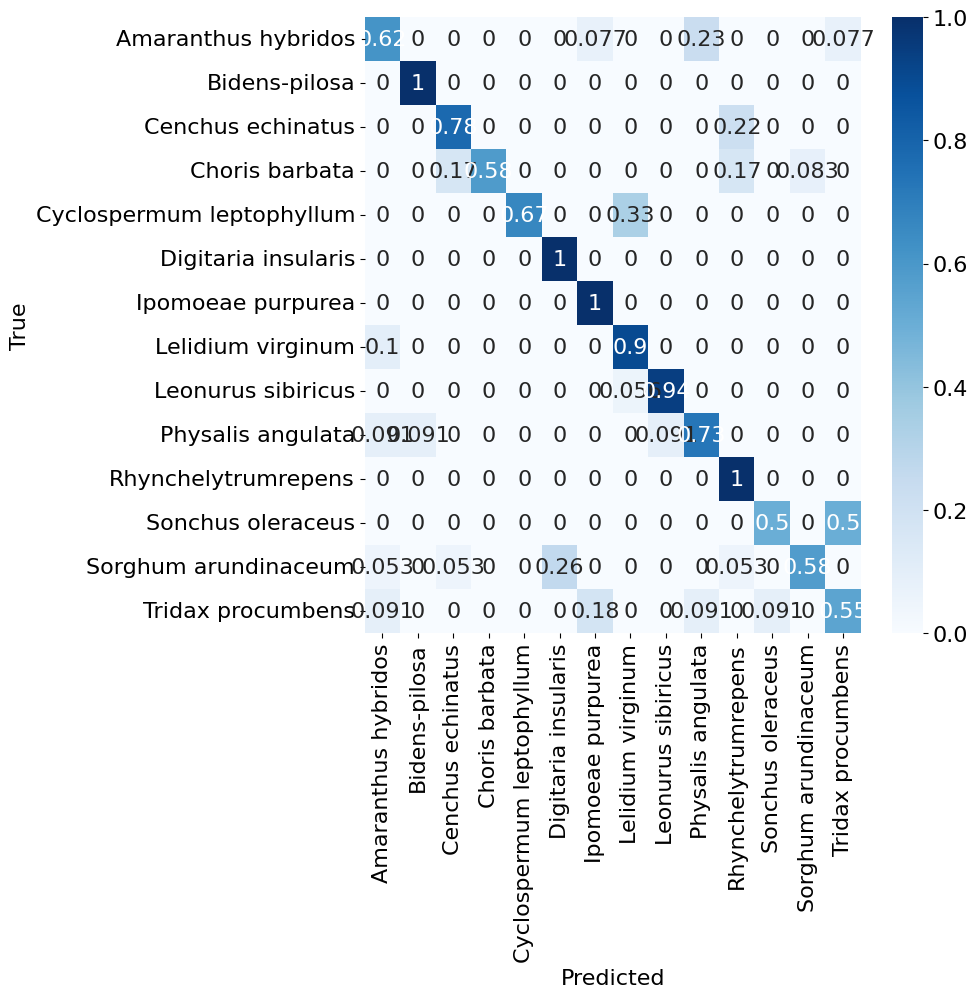

                           precision    recall  f1-score   support

      Amaranthus hybridos     0.6667    0.6154    0.6400        13
            Bidens-pilosa     0.9231    1.0000    0.9600        12
        Cenchus echinatus     0.7000    0.7778    0.7368         9
           Choris barbata     1.0000    0.5833    0.7368        12
Cyclospermum leptophyllum     1.0000    0.6667    0.8000         6
      Digitaria insularis     0.5833    1.0000    0.7368         7
        Ipomoeae purpurea     0.7273    1.0000    0.8421         8
        Lelidium virginum     0.7500    0.9000    0.8182        10
       Leonurus sibiricus     0.9444    0.9444    0.9444        18
        Physalis angulata     0.6667    0.7273    0.6957        11
      Rhynchelytrumrepens     0.6429    1.0000    0.7826         9
        Sonchus oleraceus     0.5000    0.5000    0.5000         2
     Sorghum arundinaceum     0.9167    0.5789    0.7097        19
        Tridax procumbens     0.7500    0.5455    0.6316     

In [ ]:
vgg19_model = VGG19(weights='imagenet', include_top=False)

for layer in vgg19_model.layers:
  layer.trainable = False

x = vgg19_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(num_classes)(x)

model = Model(inputs=vgg19_model.input, outputs=predictions)

model.compile(optimizer='adam', loss=FocalLoss(), metrics=['accuracy'])
model.fit(augmented_train_ds, validation_data=resized_val_ds, epochs=epochs)

predictions = model.predict(resized_test_ds)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in resized_test_ds], axis=0)

conf_matrix = confusion_matrix(true_labels, predicted_labels, normalize='true')

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(true_labels, predicted_labels, target_names=class_names, digits=4))

Epoch 1/20
17/17 [==============================] - 9s 443ms/step - loss: 0.9058 - accuracy: 0.7188 - val_loss: 1.0000 - val_accuracy: 0.6354
Epoch 2/20
17/17 [==============================] - 8s 449ms/step - loss: 0.8327 - accuracy: 0.7537 - val_loss: 0.9852 - val_accuracy: 0.6667
Epoch 3/20
17/17 [==============================] - 8s 448ms/step - loss: 0.7868 - accuracy: 0.7647 - val_loss: 0.9601 - val_accuracy: 0.6771
Epoch 4/20
17/17 [==============================] - 8s 447ms/step - loss: 0.7789 - accuracy: 0.7463 - val_loss: 0.9578 - val_accuracy: 0.6771
Epoch 5/20
17/17 [==============================] - 8s 450ms/step - loss: 0.7491 - accuracy: 0.7647 - val_loss: 0.9361 - val_accuracy: 0.6979
Epoch 6/20
17/17 [==============================] - 8s 447ms/step - loss: 0.7289 - accuracy: 0.7739 - val_loss: 0.8253 - val_accuracy: 0.7292
Epoch 7/20
17/17 [==============================] - 8s 448ms/step - loss: 0.6879 - accuracy: 0.8033 - val_loss: 0.8321 - val_accuracy: 0.7292
Epoch 

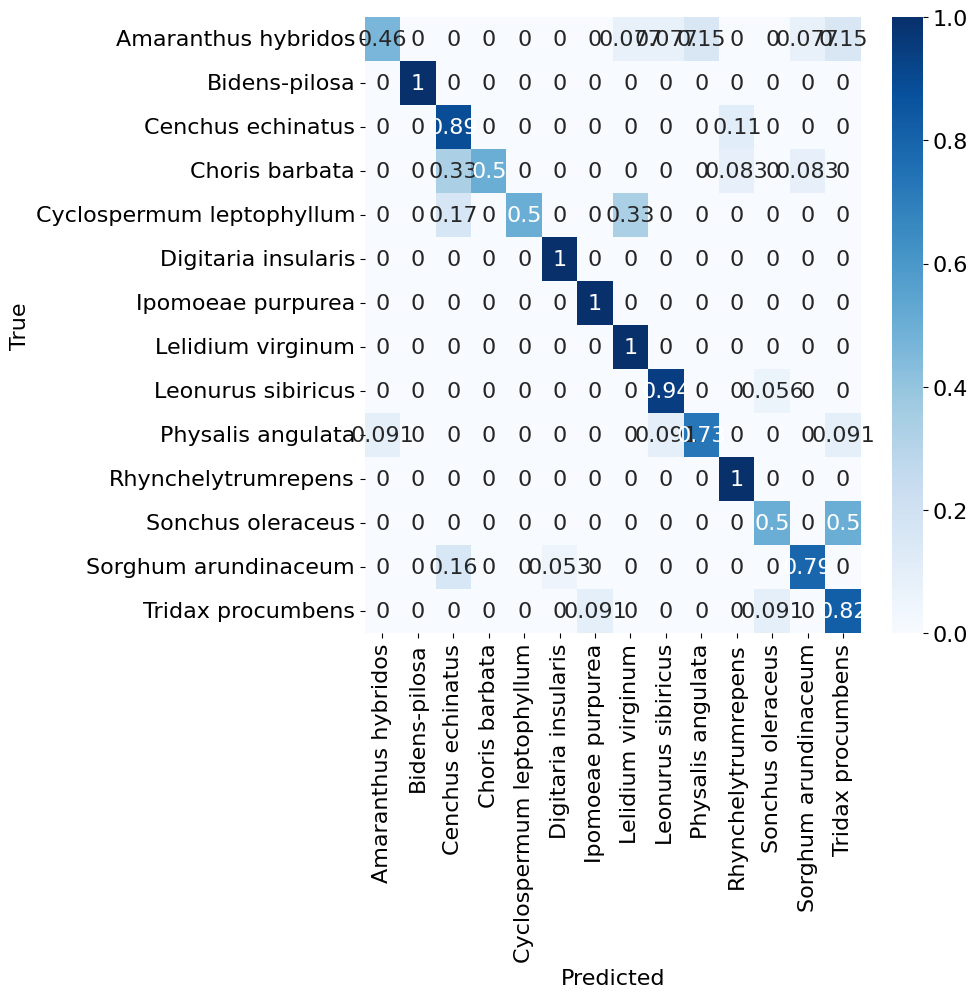

                           precision    recall  f1-score   support

      Amaranthus hybridos     0.8571    0.4615    0.6000        13
            Bidens-pilosa     1.0000    1.0000    1.0000        12
        Cenchus echinatus     0.5000    0.8889    0.6400         9
           Choris barbata     1.0000    0.5000    0.6667        12
Cyclospermum leptophyllum     1.0000    0.5000    0.6667         6
      Digitaria insularis     0.8750    1.0000    0.9333         7
        Ipomoeae purpurea     0.8889    1.0000    0.9412         8
        Lelidium virginum     0.7692    1.0000    0.8696        10
       Leonurus sibiricus     0.8947    0.9444    0.9189        18
        Physalis angulata     0.8000    0.7273    0.7619        11
      Rhynchelytrumrepens     0.8182    1.0000    0.9000         9
        Sonchus oleraceus     0.3333    0.5000    0.4000         2
     Sorghum arundinaceum     0.8824    0.7895    0.8333        19
        Tridax procumbens     0.6923    0.8182    0.7500     

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
  loss_weights=class_weights
)

model.fit(augmented_train_ds, validation_data=resized_val_ds, epochs=epochs)

predictions = model.predict(resized_test_ds)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in resized_test_ds], axis=0)

conf_matrix = confusion_matrix(true_labels, predicted_labels, normalize='true')

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(true_labels, predicted_labels, target_names=class_names, digits=4))


### ResNet152

evaluating with test data
5/5 [==============================] - 40s 5s/step


TypeError: 'Axes' object is not subscriptable

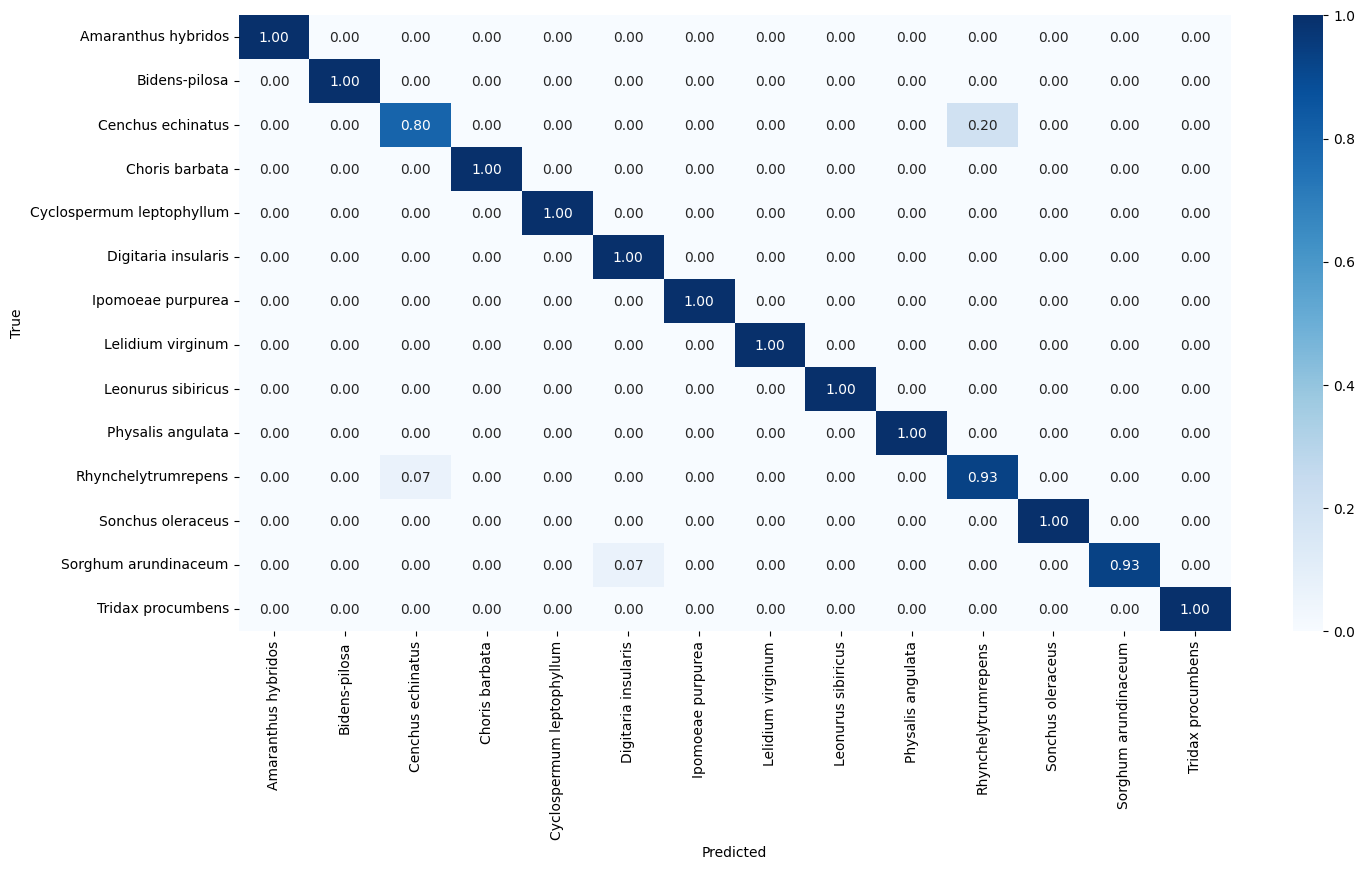

In [ ]:
# resnet152_model = ResNet152(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
# resnet152_model_fc, resnet152_history_fc, resnet152_model_wce, resnet152_history_wce = build_focal_weighted_loss_comparision(resnet152_model, train_ds, val_ds, epochs=epochs)

fig_resnet152, resnet152_wce_report = generate_fc_wce_comparison(resnet152_model_fc, resnet152_model_wce, test_ds, class_names)
# print("General results for focal loss")
# print(resnet152_fc_report)

print("General results for WCE")
print(resnet152_wce_report)

### ResNet50

94765736/94765736 [==============================] - 0s 0us/step
Training with focal loss
Epoch 1/20
17/17 [==============================] - 12s 499ms/step - loss: 0.5883 - accuracy: 0.2868 - val_loss: 0.2351 - val_accuracy: 0.4792
Epoch 2/20
17/17 [==============================] - 7s 437ms/step - loss: 0.1755 - accuracy: 0.6526 - val_loss: 0.1606 - val_accuracy: 0.7083
Epoch 3/20
17/17 [==============================] - 7s 436ms/step - loss: 0.1071 - accuracy: 0.7868 - val_loss: 0.1163 - val_accuracy: 0.8021
Epoch 4/20
17/17 [==============================] - 7s 436ms/step - loss: 0.0727 - accuracy: 0.8382 - val_loss: 0.0843 - val_accuracy: 0.8333
Epoch 5/20
17/17 [==============================] - 7s 437ms/step - loss: 0.0410 - accuracy: 0.9430 - val_loss: 0.0843 - val_accuracy: 0.8438
Epoch 6/20
17/17 [==============================] - 7s 436ms/step - loss: 0.0305 - accuracy: 0.9485 - val_loss: 0.0824 - val_accuracy: 0.8229
Epoch 7/20
17/17 [==============================] - 7s 43

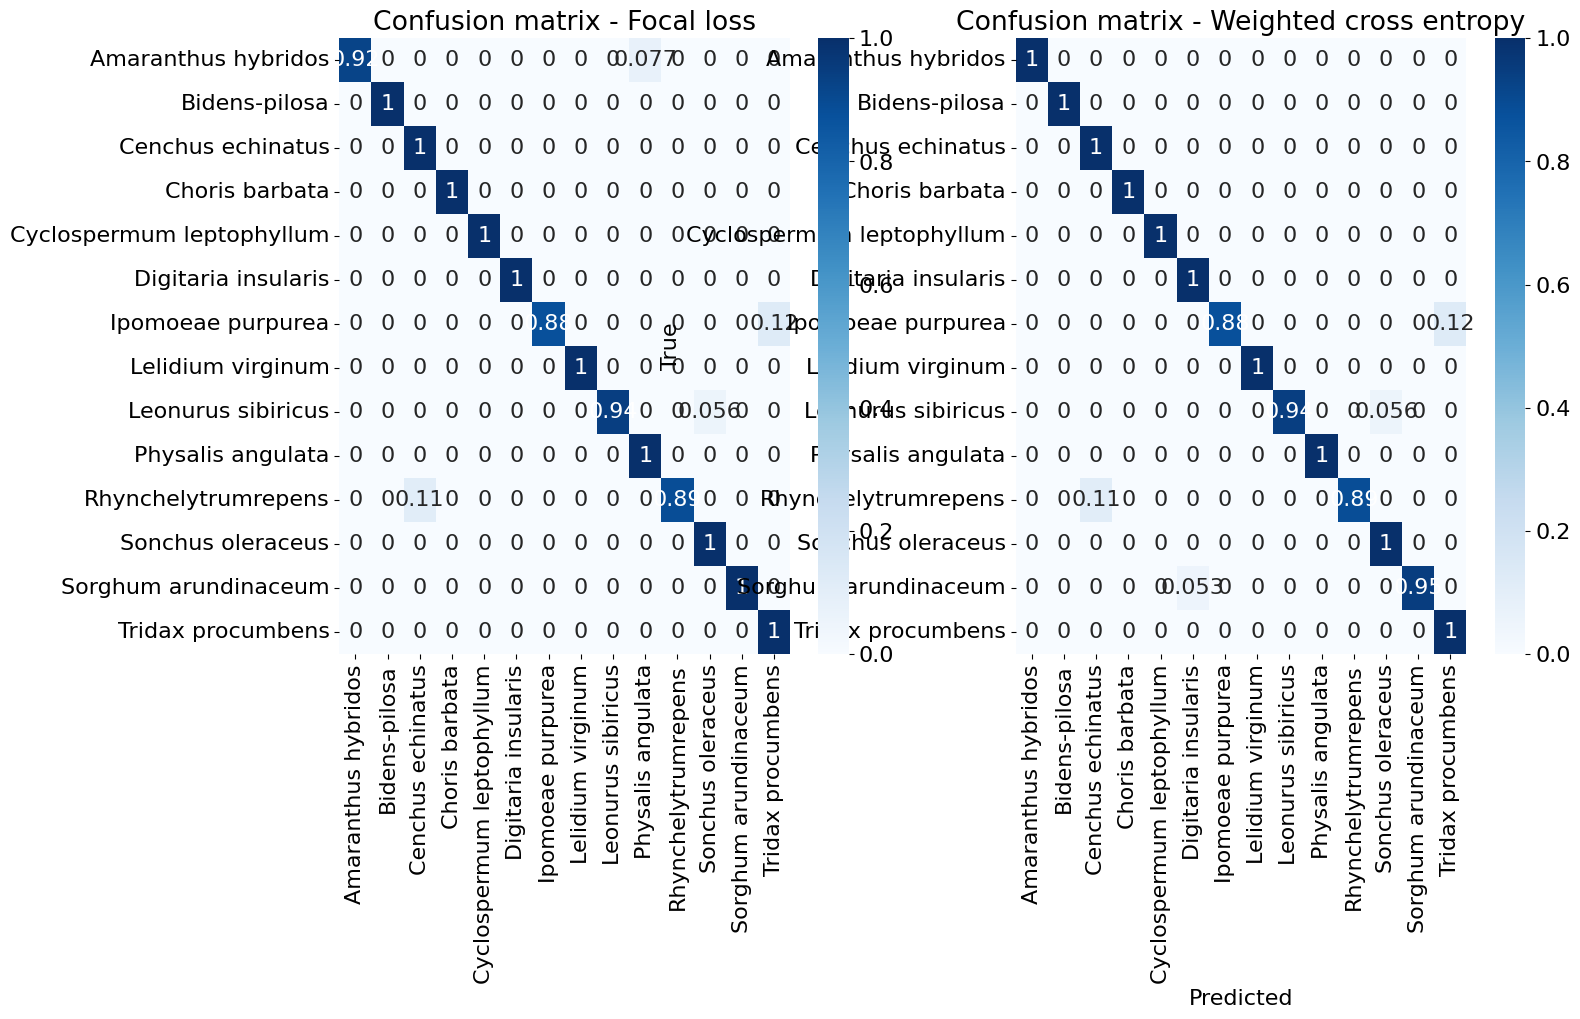

In [ ]:
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
resnet50_model_fc, resnet50_history_fc, resnet50_model_wce, resnet50_history_wce = build_focal_weighted_loss_comparision(resnet50_model, train_ds, val_ds, epochs=epochs)

fig_resnet50, resnet50_fc_report, resnet50_wce_report = generate_fc_wce_comparison(resnet50_model_fc, resnet50_model_wce, test_ds, class_names)
print("General results for focal loss")
print(resnet50_fc_report)

print("General results for WCE")
print(resnet50_wce_report)

### Resnet101

171446536/171446536 [==============================] - 1s 0us/step
Training with focal loss
Epoch 1/20
17/17 [==============================] - 20s 800ms/step - loss: 0.5354 - accuracy: 0.3529 - val_loss: 0.2744 - val_accuracy: 0.5833
Epoch 2/20
17/17 [==============================] - 11s 677ms/step - loss: 0.1591 - accuracy: 0.6746 - val_loss: 0.1452 - val_accuracy: 0.6667
Epoch 3/20
17/17 [==============================] - 11s 676ms/step - loss: 0.0826 - accuracy: 0.8272 - val_loss: 0.0940 - val_accuracy: 0.7604
Epoch 4/20
17/17 [==============================] - 11s 676ms/step - loss: 0.0695 - accuracy: 0.8346 - val_loss: 0.0832 - val_accuracy: 0.7812
Epoch 5/20
17/17 [==============================] - 11s 677ms/step - loss: 0.0600 - accuracy: 0.8621 - val_loss: 0.0889 - val_accuracy: 0.8333
Epoch 6/20
17/17 [==============================] - 11s 676ms/step - loss: 0.0378 - accuracy: 0.9081 - val_loss: 0.0709 - val_accuracy: 0.8021
Epoch 7/20
17/17 [==============================] 

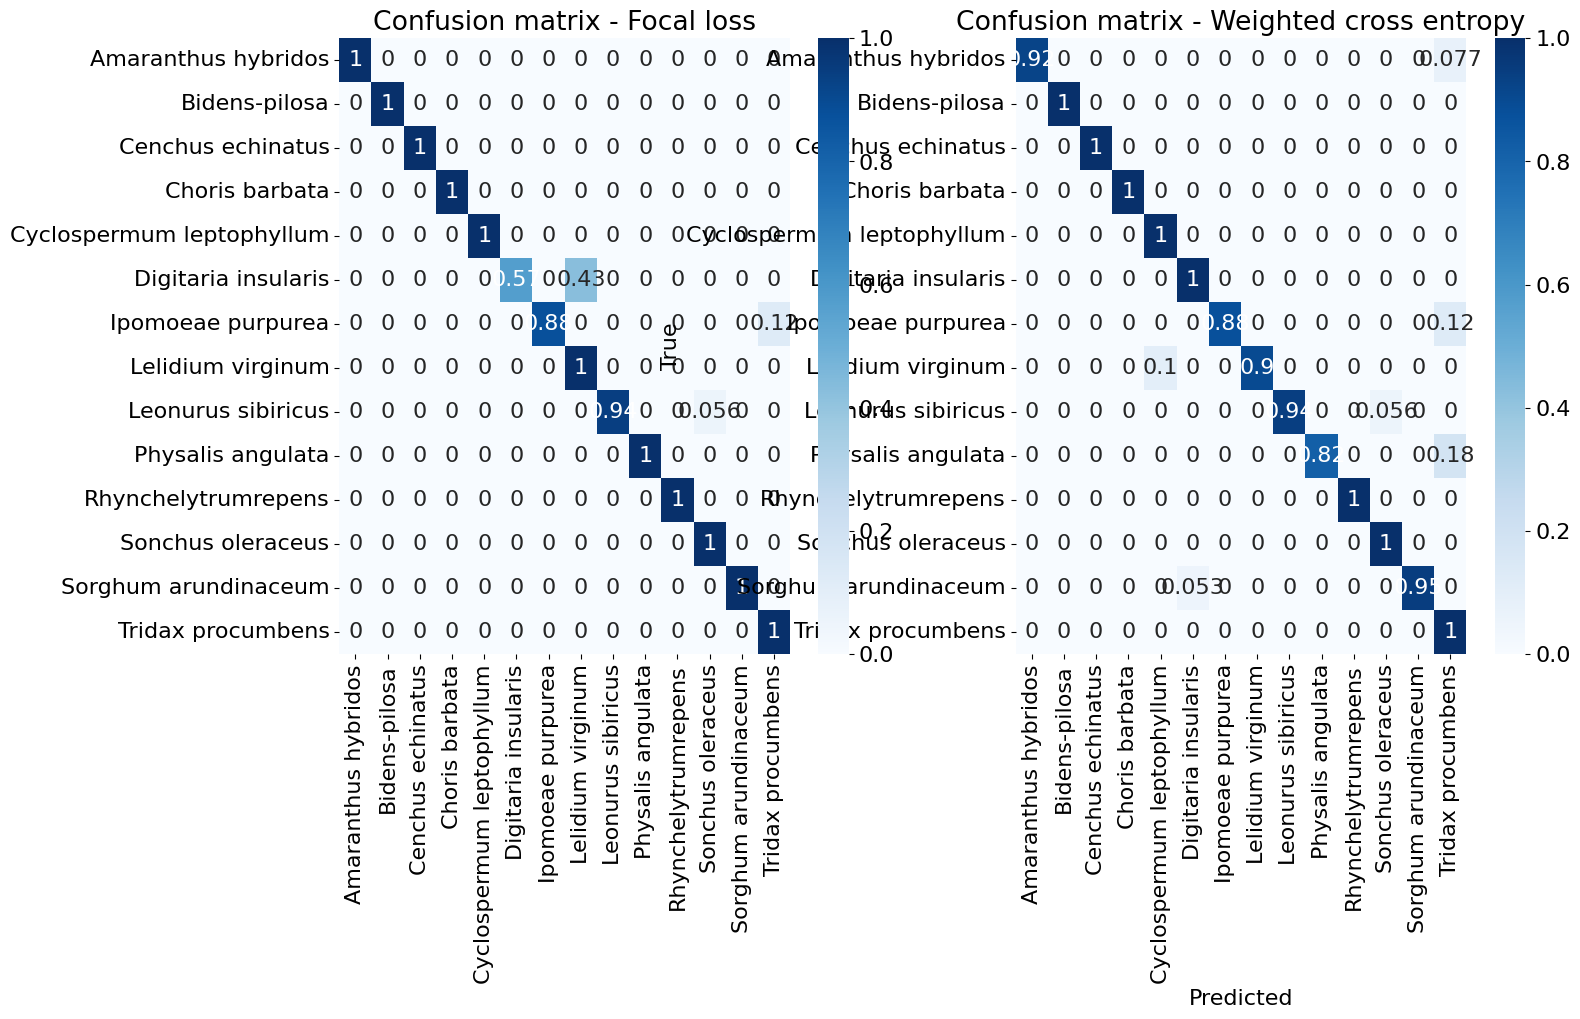

In [ ]:
resnet101_model = ResNet101(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
resnet101_model_fc, resnet101_history_fc, resnet101_model_wce, resnet101_history_wce = build_focal_weighted_loss_comparision(resnet101_model, train_ds, val_ds, epochs=epochs)

fig_resnet101, resnet101_fc_report, resnet101_wce_report = generate_fc_wce_comparison(resnet101_model_fc, resnet101_model_wce, test_ds, class_names)
print("General results for focal loss")
print(resnet101_fc_report)

print("General results for WCE")
print(resnet101_wce_report)

### MobileNetV3

12683000/12683000 [==============================] - 0s 0us/step
Training with focal loss
Epoch 1/20
17/17 [==============================] - 10s 361ms/step - loss: 0.3802 - accuracy: 0.3971 - val_loss: 0.1893 - val_accuracy: 0.6042
Epoch 2/20
17/17 [==============================] - 4s 250ms/step - loss: 0.0996 - accuracy: 0.7868 - val_loss: 0.1036 - val_accuracy: 0.7396
Epoch 3/20
17/17 [==============================] - 4s 250ms/step - loss: 0.0445 - accuracy: 0.8934 - val_loss: 0.0944 - val_accuracy: 0.7292
Epoch 4/20
17/17 [==============================] - 4s 250ms/step - loss: 0.0404 - accuracy: 0.8971 - val_loss: 0.0530 - val_accuracy: 0.8750
Epoch 5/20
17/17 [==============================] - 4s 250ms/step - loss: 0.0236 - accuracy: 0.9320 - val_loss: 0.0901 - val_accuracy: 0.7917
Epoch 6/20
17/17 [==============================] - 4s 250ms/step - loss: 0.0261 - accuracy: 0.9320 - val_loss: 0.0370 - val_accuracy: 0.8854
Epoch 7/20
17/17 [==============================] - 4s 25

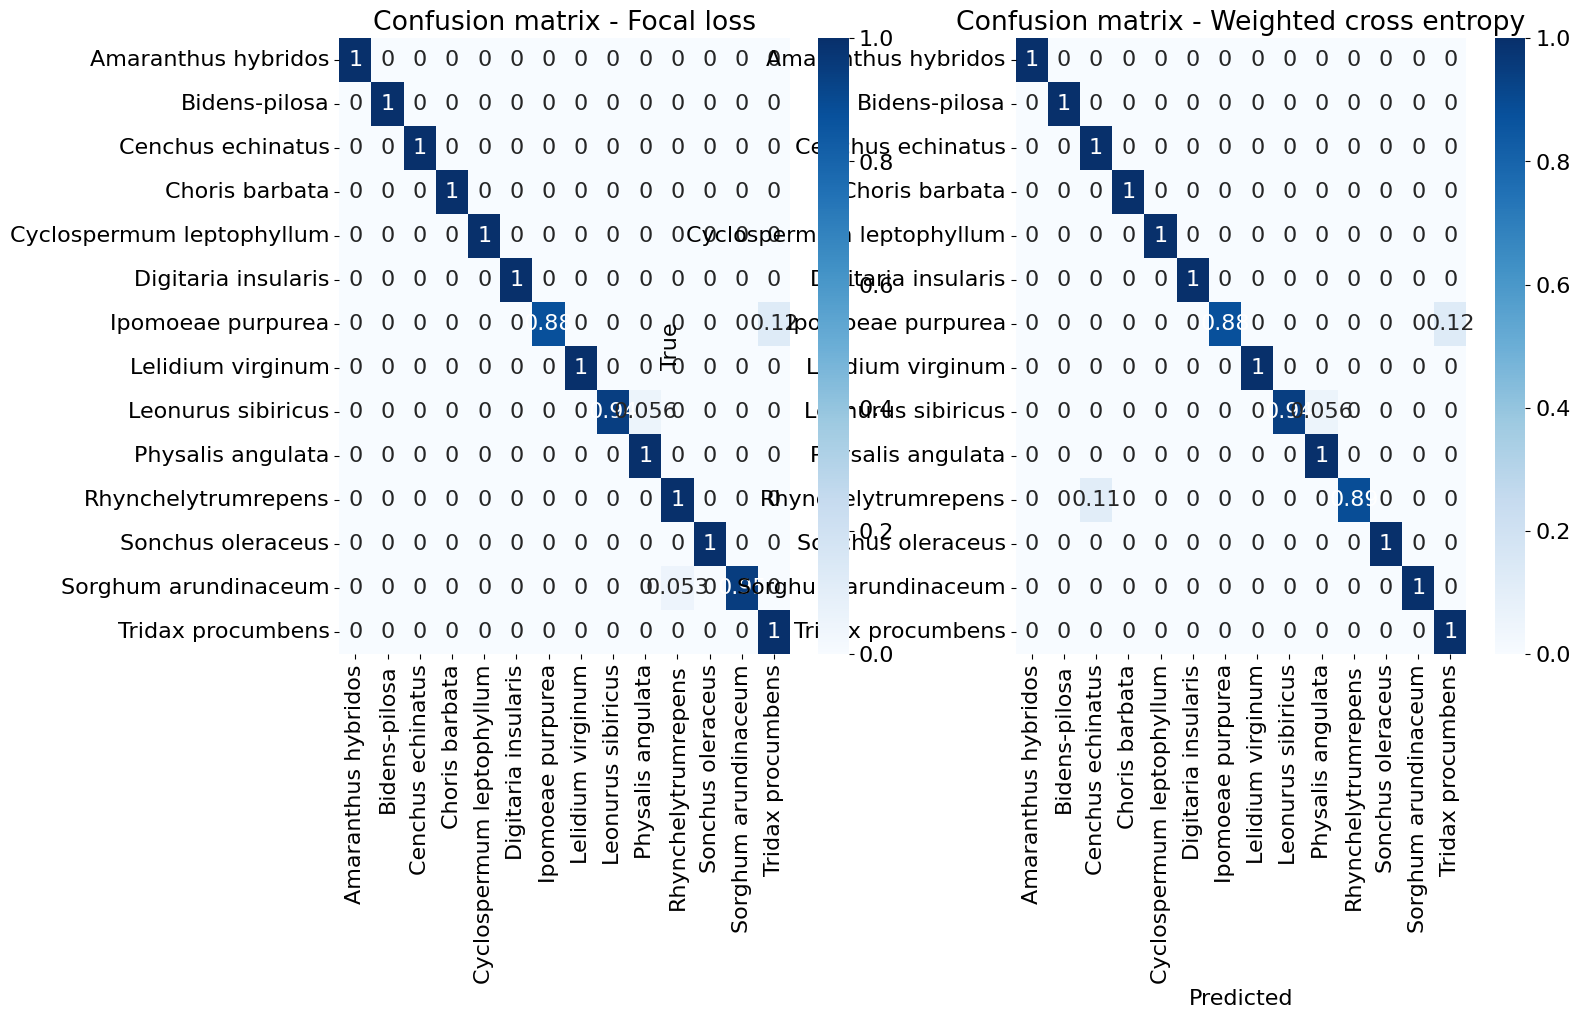

In [ ]:
mobile_net_V3_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
mobile_net_V3_model_fc, mobile_net_V3_history_fc, mobile_net_V3_model_wce, mobile_net_V3_history_wce = build_focal_weighted_loss_comparision(mobile_net_V3_model, train_ds, val_ds, epochs=epochs)

fig_mobile_net_V3, mobile_net_V3_fc_report, mobile_net_V3_wce_report = generate_fc_wce_comparison(mobile_net_V3_model_fc, mobile_net_V3_model_wce, test_ds, class_names)
print("General results for focal loss")
print(mobile_net_V3_fc_report)

print("General results for WCE")
print(mobile_net_V3_wce_report)

### MobileNetV2

9406464/9406464 [==============================] - 0s 0us/step
Training with focal loss
Epoch 1/20
17/17 [==============================] - 9s 318ms/step - loss: 0.5964 - accuracy: 0.1232 - val_loss: 0.5341 - val_accuracy: 0.2083
Epoch 2/20
17/17 [==============================] - 4s 264ms/step - loss: 0.4656 - accuracy: 0.2353 - val_loss: 0.4143 - val_accuracy: 0.3021
Epoch 3/20
17/17 [==============================] - 4s 265ms/step - loss: 0.3807 - accuracy: 0.3603 - val_loss: 0.3881 - val_accuracy: 0.4062
Epoch 4/20
17/17 [==============================] - 4s 265ms/step - loss: 0.3487 - accuracy: 0.3989 - val_loss: 0.3425 - val_accuracy: 0.3958
Epoch 5/20
17/17 [==============================] - 4s 265ms/step - loss: 0.2933 - accuracy: 0.4761 - val_loss: 0.3156 - val_accuracy: 0.3750
Epoch 6/20
17/17 [==============================] - 4s 264ms/step - loss: 0.2681 - accuracy: 0.5147 - val_loss: 0.3134 - val_accuracy: 0.4062
Epoch 7/20
17/17 [==============================] - 4s 264ms

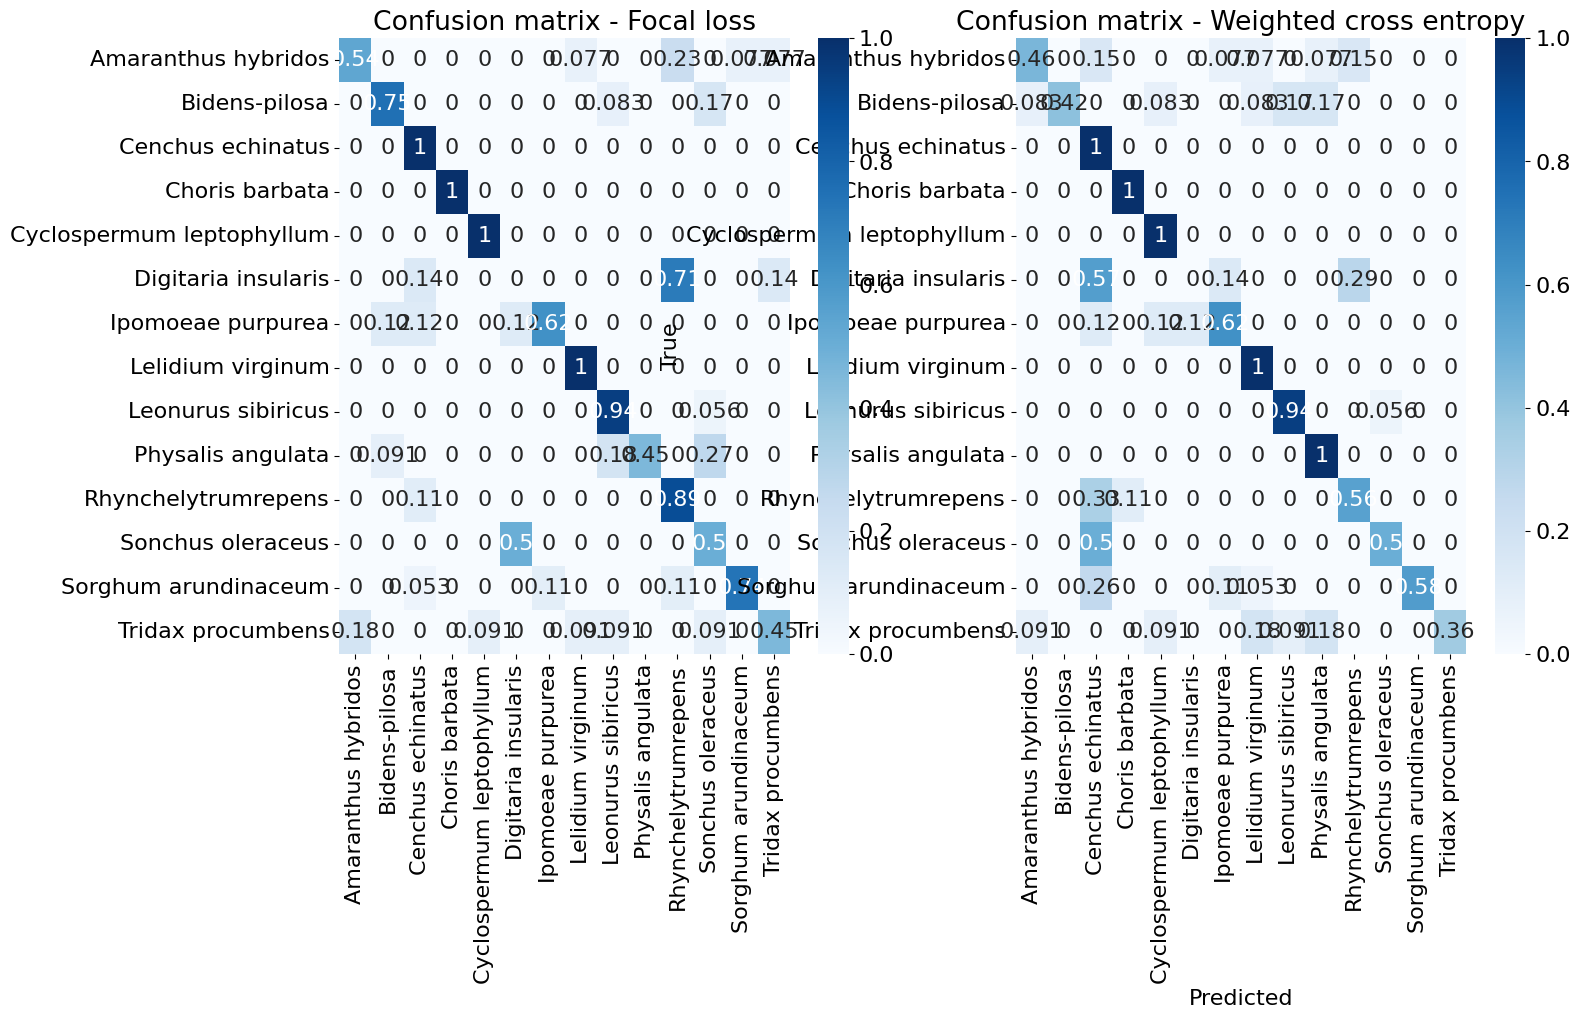

In [ ]:
mobile_net_V2_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
mobile_net_V2_model_fc, mobile_net_V2_history_fc, mobile_net_V2_model_wce, mobile_net_V2_history_wce = build_focal_weighted_loss_comparision(mobile_net_V2_model, train_ds, val_ds, epochs=epochs)

fig_mobile_net_V2, mobile_net_V2_fc_report, mobile_net_V2_wce_report = generate_fc_wce_comparison(mobile_net_V2_model_fc, mobile_net_V2_model_wce, test_ds, class_names)
print("General results for focal loss")
print(mobile_net_V2_fc_report)

print("General results for WCE")
print(mobile_net_V2_wce_report)